# Sandbox: Blur Kernel Inversion

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
import libwallerlab.utilities.simulation as sim

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt

yp.config.setDefaultBackend('numpy')

## Load Data

In [2]:
# Generate Object
x = sim.brain((256,400))
object_size = yp.shape(x)

# Generate blur kernel
kernel = md.blurkernel.generate(object_size, 20)

# Test Inversion

<IPython.core.display.Javascript object>


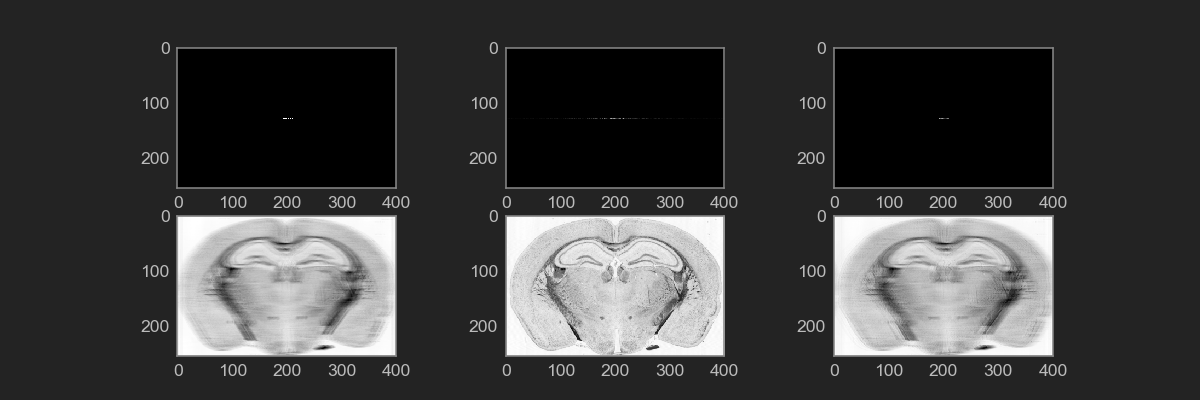

In [3]:
kernel_f  = yp.Ft(kernel)
kernel_inv =  yp.iFt(yp.conj(kernel_f) / (yp.abs(kernel_f) ** 2 + 1e-1))

# Get kernel support mask
kernel_mask = yp.boundingBox(kernel, return_roi=True)

# Filter inverse by kernel mask
kernel_inv_mask = kernel_inv * kernel_mask.mask

# Convolve object with kernel
y = yp.convolve(x, kernel)

plt.figure()
plt.subplot(231)
plt.imshow(yp.abs(kernel))
plt.subplot(232)
plt.imshow(yp.abs(kernel_inv))
plt.subplot(233)
plt.imshow(yp.abs(kernel_inv_mask))
plt.subplot(234)
plt.imshow(yp.abs(y))
plt.subplot(235)
plt.imshow(yp.abs(yp.convolve(y, kernel_inv)))
plt.subplot(236)
plt.imshow(yp.abs(yp.convolve(y, kernel_inv_mask)))